# Missing data and aggregations

In [107]:
import pandas as pd
import numpy as np

np.random.seed(1337)
size = 8

random_matrix = np.random.randint(1, 10, (size, size))

print(f"{random_matrix.size = }")

index = np.random.choice(random_matrix.size, 10, replace=False)
print(f"{index}")

random_matrix = random_matrix * 1.0  # typeconverts it to float

random_matrix.ravel()[index] = None

random_matrix


random_matrix.size = 64
[28 42 17 49 53 31 35  2 13 62]


array([[ 8.,  9., nan,  8.,  3.,  3.,  5.,  9.],
       [ 7.,  7.,  8.,  9.,  2., nan,  7.,  3.],
       [ 3., nan,  2.,  8.,  4.,  2.,  4.,  4.],
       [ 5.,  9.,  9.,  8., nan,  2.,  7., nan],
       [ 5.,  3.,  6., nan,  5.,  3.,  4.,  3.],
       [ 5.,  9., nan,  4.,  9.,  9.,  8.,  5.],
       [ 4., nan,  2.,  3.,  1., nan,  9.,  3.],
       [ 2.,  1.,  2.,  5.,  3.,  1., nan,  8.]])

In [108]:
scores = pd.DataFrame(
    random_matrix,
    index=[f"Player {i}" for i in range(1, size + 1)],
    columns=[f"Round {i}" for i in range(1, size + 1)],
)

scores

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,8.0,9.0,NaN,8.0,3.0,3.0,5.0,9.0
Player 2,7.0,7.0,8.0,9.0,2.0,NaN,7.0,3.0
Player 3,3.0,NaN,2.0,8.0,4.0,2.0,4.0,4.0
Player 4,5.0,9.0,9.0,8.0,NaN,2.0,7.0,NaN
Player 5,5.0,3.0,6.0,NaN,5.0,3.0,4.0,3.0
Player 6,5.0,9.0,NaN,4.0,9.0,9.0,8.0,5.0
Player 7,4.0,NaN,2.0,3.0,1.0,NaN,9.0,3.0
Player 8,2.0,1.0,2.0,5.0,3.0,1.0,NaN,8.0


## Missing data


In [109]:
scores.isnull()

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,False,False,True,False,False,False,False,False
Player 2,False,False,False,False,False,True,False,False
Player 3,False,True,False,False,False,False,False,False
Player 4,False,False,False,False,True,False,False,True
Player 5,False,False,False,True,False,False,False,False
Player 6,False,False,True,False,False,False,False,False
Player 7,False,True,False,False,False,True,False,False
Player 8,False,False,False,False,False,False,True,False


In [110]:
scores.loc["Player 8"]["Round 7"] = 4

scores.dropna(axis="columns")

,Round 1,Round 7
Player 1,8.0,5.0
Player 2,7.0,7.0
Player 3,3.0,4.0
Player 4,5.0,7.0
Player 5,5.0,4.0
Player 6,5.0,8.0
Player 7,4.0,9.0
Player 8,2.0,4.0


In [111]:
scores.dropna()

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 8,2.0,1.0,2.0,5.0,3.0,1.0,4.0,8.0


In [112]:
scores.fillna(0)

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,8.0,9.0,0.0,8.0,3.0,3.0,5.0,9.0
Player 2,7.0,7.0,8.0,9.0,2.0,0.0,7.0,3.0
Player 3,3.0,0.0,2.0,8.0,4.0,2.0,4.0,4.0
Player 4,5.0,9.0,9.0,8.0,0.0,2.0,7.0,0.0
Player 5,5.0,3.0,6.0,0.0,5.0,3.0,4.0,3.0
Player 6,5.0,9.0,0.0,4.0,9.0,9.0,8.0,5.0
Player 7,4.0,0.0,2.0,3.0,1.0,0.0,9.0,3.0
Player 8,2.0,1.0,2.0,5.0,3.0,1.0,4.0,8.0


In [113]:
import seaborn as sns

titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [114]:
titanic["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [115]:
titanic["adult_male"].value_counts()

True     537
False    354
Name: adult_male, dtype: int64

In [116]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [117]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [118]:
nans = titanic.isnull().sum()
nans

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot: xlabel='survived', ylabel='Count'>

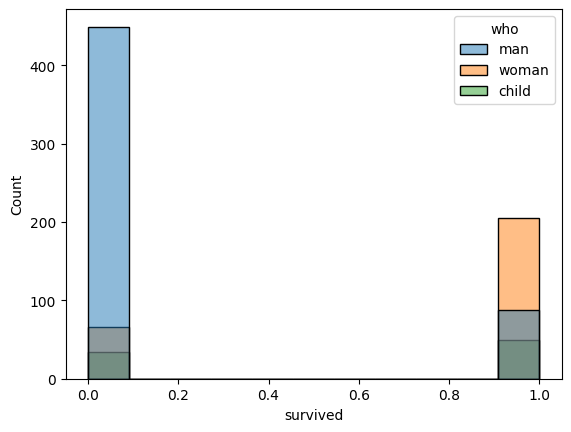

In [128]:
sns.histplot(data = titanic, x = "survived", hue = "who")

<AxesSubplot: xlabel='age', ylabel='Count'>

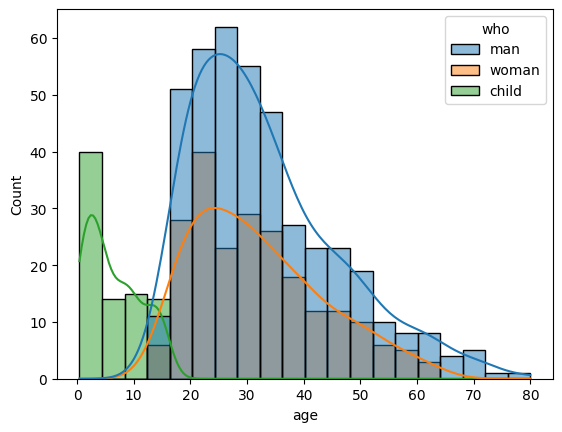

In [120]:
sns.histplot(data = titanic, x = "age", hue = "who", kde=True)

In [121]:
titanic.loc[titanic["age"].isnull(), "who"].value_counts()

man      124
woman     53
Name: who, dtype: int64

In [122]:
# case
# historian (domain expert) advises us to use median age of corresponding gender to fill in missing ages

median_male_age = titanic[titanic["sex"] == "male"]["age"].median()
median_female_age = titanic[titanic["sex"] == "female"]["age"].median()

median_female_age, median_male_age


(27.0, 29.0)

In [123]:
#titanic.loc[titanic["sex"] == "male","age"] = titanic.loc[titanic["sex"] == "male","age"].fillna(median_male_age)
#titanic.loc[titanic["sex"] == "female","age"] = titanic.loc[titanic["sex"] == "female","age"].fillna(median_female_age)


In [124]:

median_man_age = titanic[titanic["who"] == "man"]["age"].median()
median_woman_age = titanic[titanic["who"] == "woman"]["age"].median()
median_child_age = titanic[titanic["who"] == "child"]["age"].median()

median_child_age, median_woman_age, median_man_age

(5.0, 30.0, 30.0)

In [125]:
titanic.loc[titanic["who"] == "man","age"] = titanic.loc[titanic["who"] == "man","age"].fillna(median_man_age)
titanic.loc[titanic["who"] == "woman","age"] = titanic.loc[titanic["who"] == "woman","age"].fillna(median_woman_age)
titanic.loc[titanic["who"] == "child","age"] = titanic.loc[titanic["who"] == "child","age"].fillna(median_child_age)

<AxesSubplot: xlabel='age', ylabel='Count'>

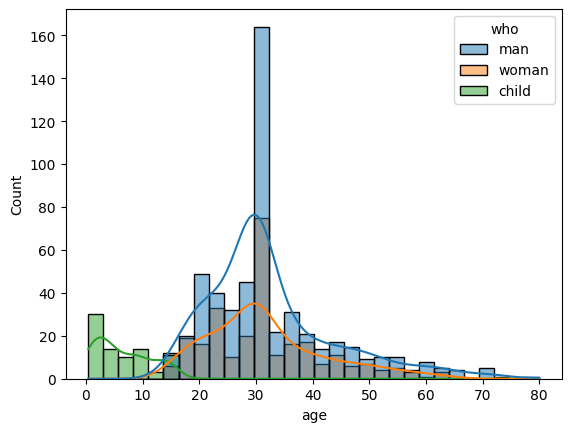

In [126]:
sns.histplot(data = titanic, x = "age", kde = True, hue = "who")

## Aggregations

- summarizing data
    - sum()
    - mean()
    - median()
    - max()
    - min()

In [127]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [143]:
survivors = titanic.groupby("who").mean(numeric_only = True)[["survived", "age"]]
survivors

,survived,age
who,,
child,0.590361,6.369518
man,0.163873,32.440410
woman,0.756458,31.608856


In [147]:
survived_women_percentage = 100*survivors.loc["woman", "survived"]
survived_men_percentage = 100*survivors.loc["man", "survived"]
survived_child_percentage = 100*survivors.loc["child", "survived"]

print(f"men survival rate {survived_men_percentage}%")
print(f"women survival rate {survived_women_percentage}%")
print(f"child survival rate {survived_child_percentage}%")

men survival rate 16.387337057728118%
women survival rate 75.64575645756457%
child survival rate 59.036144578313255%


In [152]:
titanic.groupby("class")[["age", "fare"]].mean()

,age,fare,survived
class,,,
First,37.089907,84.154687,0.629630
Second,29.884946,20.662183,0.472826
Third,26.486599,13.675550,0.242363


In [164]:
survived_class = titanic.groupby(["survived", "pclass"]).count().reset_index()
survived_class

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,1,80,80,80,80,80,80,80,80,80,58,80,80,80
1,0,2,97,97,97,97,97,97,97,97,97,3,97,97,97
2,0,3,372,372,372,372,372,372,372,372,372,6,372,372,372
3,1,1,136,136,136,136,136,134,136,136,136,117,134,136,136
4,1,2,87,87,87,87,87,87,87,87,87,13,87,87,87
5,1,3,119,119,119,119,119,119,119,119,119,6,119,119,119


<AxesSubplot: xlabel='pclass', ylabel='sex'>

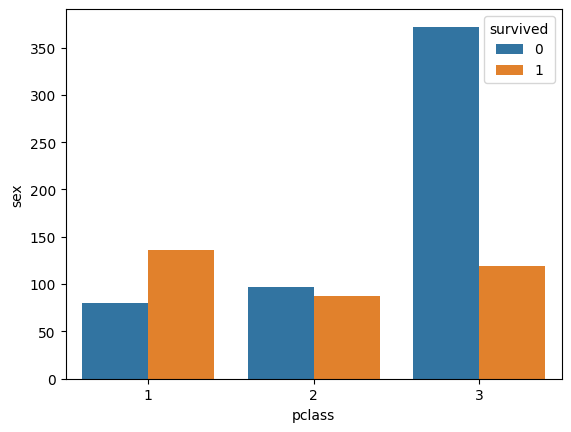

In [162]:
sns.barplot(data = survived_class, x = "pclass", y = "sex", hue = "survived")